<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 3.1.2 
# *Exploring Data*

## Part 1: Continuous and Categorical Data

When we explore a dataset we usually produce textual and graphical output together, starting with a high-level overview of the data and gradually drilling down into the individual features and relationships between them. 

Our most important libraries for this task are:

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


/Users/doron/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
# Override default figure sizing:
pylab.rcParams['figure.figsize'] = (10, 6)
sns.set(color_codes = True)

## Data Profiling

We actually start profiling the data when we first load it and check for input errors, as in the last lab. Once we have a DataFrame we can work with, however, things start getting more interesting.

**Load the file "bikeshare.csv" into a DataFrame named `bikes`, and check that it was loaded properly:**

In [7]:
#ANSWER:
bikes = pd.read_table("../../DATA/bikeshare.csv" , delimiter=",")

We may want our program to capture particular features of the dataset into variables, but if we just want to get a feel for the data it is easier to use a higher-level Pandas method like `describe()`:

**Use `describe` to get the description of datasets.**

In [4]:
#ANSWER:
bikes.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Continuous Data

We may have to do a lot of work before we can produce presentable graphics, but we can start creating simple visualisations as soon as we have a DataFrame. 

We usually start charting variables one-by-one (although when several have the same range it may be preferable to overlay them, using a different colour or symbol for each).

**Use the `scatter` method of Pandas to create a scatter plot of `windspeed`, `temp`:**

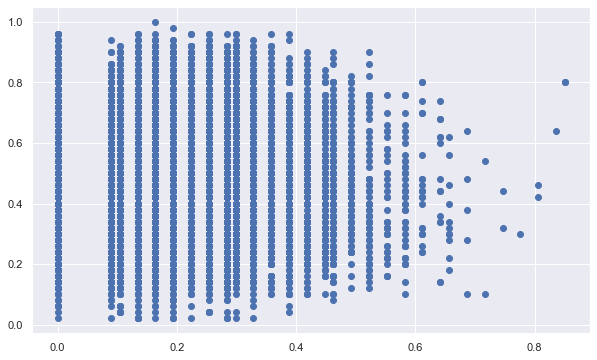

In [8]:
#ANSWER

plt.scatter(bikes['windspeed'], bikes['temp'])

**The `scatter` method has various parameters for controlling the appearance of the chart. Experiment with `s` , `linewidths`, and `alpha` below:**

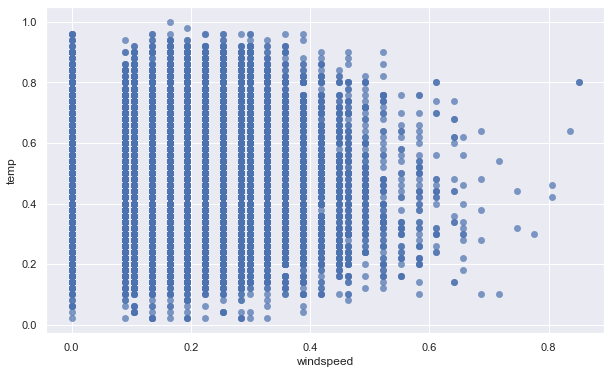

In [9]:
#ANSWER
plt.xlabel('windspeed')
plt.ylabel('temp')
plt.scatter(bikes['windspeed'], bikes['temp'], s=40, linewidths=0.5, alpha=0.7 )


In [7]:
bikes['windspeed'].max()

0.8507

The scatterplot shows us the raw data. Our next step is usually to see how it is distributed, which is what the histogram is for: 

> A histogram is used for continuous data, where the bins represent ranges of data, while a bar chart is a plot of categorical variables. <sup>[1](#histfootnote)</sup>

- **Identify continuous varaibles**
- **Create histogram for those variables**

In [8]:
#ANSWER
#temp, atemp,hum,windspeed



In [9]:
bikes.select_dtypes(include=[float])



,temp,atemp,hum,windspeed
0,0.24,0.2879,0.81,0.0000
1,0.22,0.2727,0.80,0.0000
2,0.22,0.2727,0.80,0.0000
3,0.24,0.2879,0.75,0.0000
4,0.24,0.2879,0.75,0.0000
...,...,...,...,...
17374,0.26,0.2576,0.60,0.1642
17375,0.26,0.2576,0.60,0.1642
17376,0.26,0.2576,0.60,0.1642
17377,0.26,0.2727,0.56,0.1343


What do the horizontal and vertical axes represent?

#### ANSWER: 
    horiz = magnitude of `atemp`, apparently normalised to [0, 1], discretised into bins of width 0.1; 
    vertical = counts of samples in each bin.

*NOTE: Samples in a given bin are greater than the axis value of its left side and less than or equal to the axis value of its right side. (The left-most bin is an exception: it represents greater than or equal to.)*

The box-and-whisker plot provides a compact view of the major percentiles of the distribution:

**Make a box and whisker plot for the column ``atemp``.**  

> The box extends from the lower to
upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data.  Flier points are those past the end of the whiskers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f96573809d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9657387490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9657380410>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9657387f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f96573904d0>],
 'means': []}

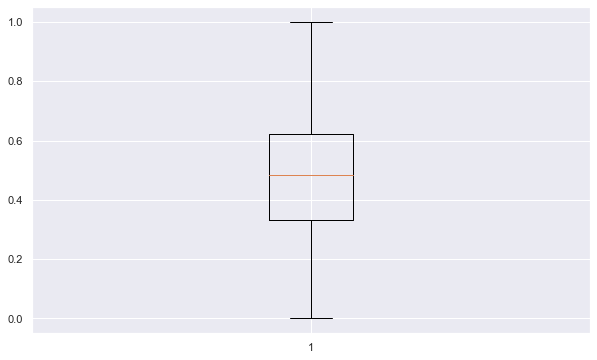

In [10]:
#ANSWER
plt.boxplot(bikes['atemp'])

This kind of plot really shines when we want to show several distributions at once (as long as they have compatible ranges). 

**Plot `atemp` and `windspeed` together. Change labels accordingly.**

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9657686750>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9657b031d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f96576861d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9657b03c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9657b0c1d0>],
 'means': []}

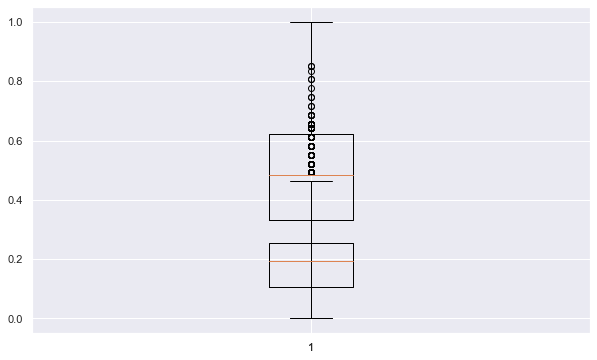

In [16]:
#ANSWER
plt.boxplot(bikes['atemp'])
plt.boxplot(bikes['windspeed'])


               


In [15]:
#learning
#x = [[4,1,3,3,3,4,4], [1,4,4,3,3,3,3]]

#plt.hist(x)
#plt.boxplot(x)

In [13]:
### Classified Data

Samples may represent different classes according to one or more categorical variables. Sometimes our goal is to discover these classes, or to train a classification model from samples that have been manually classified.

SyntaxError: invalid syntax (<ipython-input-13-8db9f1cf3102>, line 3)

Here, the famous "Iris" dataset gets loaded from the UCI repository:

In [17]:
import urllib

# get Iris dataset from UCI Machine Learning Repository:
url = "http://goo.gl/HppjFh" 
raw_data = urllib.request.urlopen(url)

# load the CSV file:
iris_data = pd.read_csv(raw_data, delimiter = ",", 
                        names = ('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'))

Note that the column names were overridden by the `names` argument of the Pandas `read.csv` method. This requires prior knowledge of the dataset, which we would normally get from a data dictionary (although sometimes we just have to figure it out for ourselves).

**Print the first few rows of this DataFrame:**

In [18]:
#ANSWER
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# In this dataset, `species` has several possible values (representing the classes of the samples).

**Find out distinct number of `species` and number of sample for each `species` in this dataset.**

In [19]:
#ANSWER
#iris_data['species']
output = []
for x in (iris_data['species']):
    if x not in output:
        output.append(x)
        print(x + "Species samples #" + str((iris_data['species'] == x).count()))

    
#for sample in output:
#    print((iris_data[iris_data['species'] == sample]).count())
              
#print("Iris-setosa  \n"  + str(iris_data[iris_data['species'] == 'Iris-setosa'].count()))
#print((iris_data['species'] == 'Iris-setosa').count())



Iris-setosaSpecies samples #150
Iris-versicolorSpecies samples #150
Iris-virginicaSpecies samples #150


We often need to capture the number of classes in code. We can do this with a variation on the above. Try this below:

In [ ]:
#ANSWER

We often need to calculate aggregate values within subgroups of the dataset. The Pandas DataFrame method for this is `groupby`. 

**Apply the `groupby` method to get `mean` of `sepal_length` and `sepal_width` for the above dataset.**

In [20]:
#ANSWER 

print(iris_data.groupby(iris_data.loc[:, 'sepal_width']).mean())
#
print(iris_data.groupby(iris_data.loc[:, 'sepal_length']).mean())


             sepal_length  petal_length  petal_width
sepal_width                                         
2.0              5.000000      3.500000     1.000000
2.2              6.066667      4.500000     1.333333
2.3              5.325000      3.250000     0.975000
2.4              5.300000      3.600000     1.033333
2.5              5.762500      4.512500     1.550000
2.6              6.160000      4.880000     1.420000
2.7              5.855556      4.622222     1.555556
2.8              6.335714      5.042857     1.707143
2.9              6.060000      4.350000     1.320000
3.0              6.015385      4.234615     1.403846
3.1              5.941667      3.600000     1.141667
3.2              5.884615      3.753846     1.261538
3.3              6.016667      4.200000     1.566667
3.4              5.316667      2.466667     0.716667
3.5              5.150000      1.416667     0.300000
3.6              5.600000      2.833333     0.966667
3.7              5.266667      1.500000     0.

In [ ]:
iris_data.loc[:, [ 'sepal_width', 'sepal_length']].mean()

In [21]:
iris_data.loc[:, [ 'sepal_width', 'sepal_length']]


,sepal_width,sepal_length
0,3.5,5.1
1,3.0,4.9
2,3.2,4.7
3,3.1,4.6
4,3.6,5.0
...,...,...
145,3.0,6.7
146,2.5,6.3
147,3.0,6.5
148,3.4,6.2


The Pandas `plot` method provides a quick way to produce a scatter plot.

**Draw a Scatterplot showing sepal width and length using the Pandas `plot` method.**

In [ ]:
#ANSWER
iris_data.loc[:, [ 'sepal_width', 'sepal_length']].mean()

**Draw a Barplot showing sepal width and length using the Pandas plot method.**

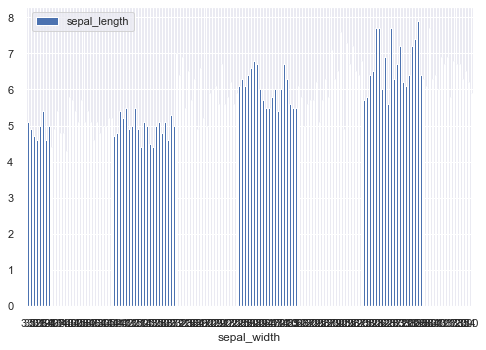

In [107]:
#ANSWER
iris_data.loc[:,  ['sepal_width', 'sepal_length']]
iris_data.plot.bar('sepal_width', 'sepal_length', rot=0)

Draw a Scatterplot showing sepal width and length using the Pandas plot method.

**[BONUS] Set `title`, `xlabel`, `ylabel` to the plot**

In [ ]:
#ANSWER

In this dataset we have also `petal_width`, `petal_length`. 

**Try to draw Scatterplot using these variables.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9641d96f50>,
      dtype=object)

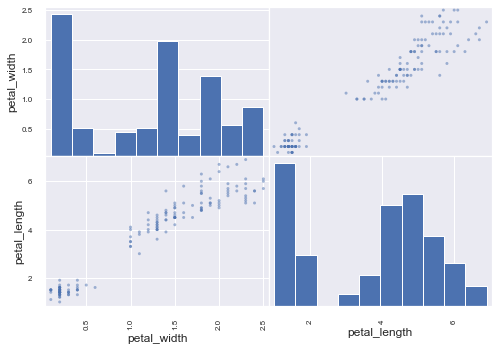

In [55]:
#ANSWER
import pandas as pd
df = iris_data.loc[:, ['petal_width','petal_length']]
df
pd.pandas.plotting.scatter_matrix(df)

In this case, we already have different species, so we can colour the points accordingly. This is easy to do using the Seaborn library. Try using `lmplot` of seaborn library and use the parameter `hue` and `fit_reg = False`.

**Draw a Scatterplot showing sepal width and length.**

In [ ]:
# ANSWER
# Draw a Scatterplot showing sepal width and length:`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f964db33b50>,
      dtype=object)

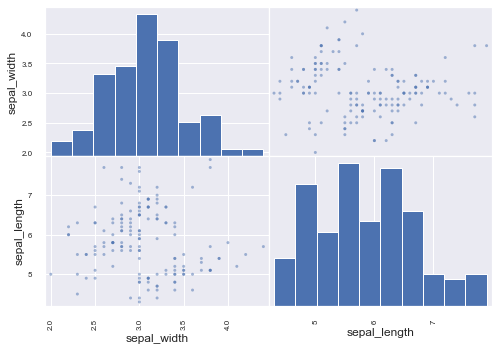

In [91]:
df = iris_data.loc[:, ['sepal_width','sepal_length']]

pd.pandas.plotting.scatter_matrix(df)

**[BONUS] Draw a Scatterplot showing sepal width and length. Without using seaborn.**

In [92]:
# ANSWER
#pd.pandas.plotting.scatter_matrix(df.loc[:, ['sepal_width' ,'sepal_length']])
import matplotlib as plt
iris_data['sepal_width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [83]:
plt.scatter(df.loc[:, ['sepal_width' ,'sepal_length']])

TypeError: scatter() missing 1 required positional argument: 'y'

In [77]:
import seaborn as sns; sns.set()
df
#sns.scatterplot(x="sepal_width", y="sepal_length", data=df)
############3

,sepal_width,sepal_length
0,3.5,5.1
1,3.0,4.9
2,3.2,4.7
3,3.1,4.6
4,3.6,5.0
...,...,...
145,3.0,6.7
146,2.5,6.3
147,3.0,6.5
148,3.4,6.2


To find out why this function is called `lmplot`, try it again with `fit_reg` = True:

**Draw a Scatterplot showing sepal width and length:**

In [62]:
# ANSWER
# Draw a Scatterplot showing sepal width and length:
df['sepal_width'].max()

4.4

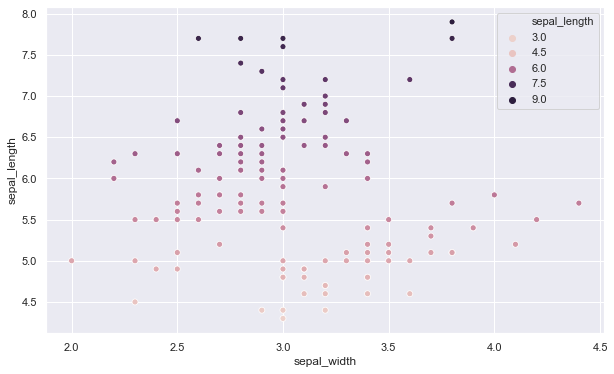

In [26]:
sns.scatterplot(x="sepal_width", y="sepal_length", hue='sepal_length', data=df)

The Seaborn `jointplot` function charts a correlation along with both distributions:

**Draw a jointplot showing sepal width and length:**

In [ ]:
# ANSWER

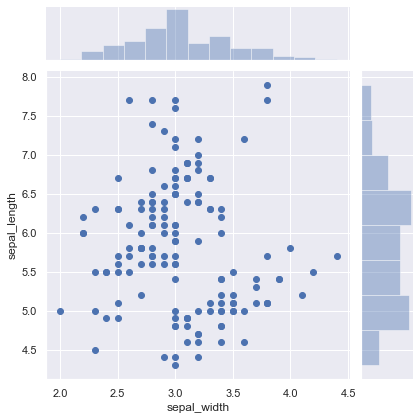

In [27]:
sns.jointplot(x="sepal_width", y="sepal_length",  data=df)

When we want to see all the correlations at once, we can use `pairplot`:

**Draw a `pairplot` of the dataset:**

In [ ]:
# ANSWER

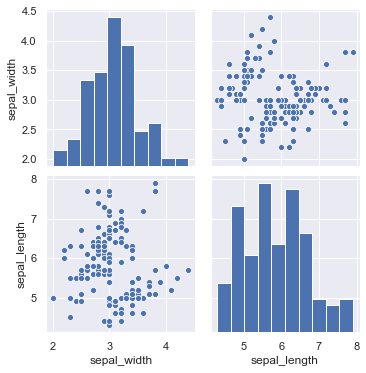

In [28]:
sns.pairplot(df)

And, if the classes are known, we can apply colour using the `hue` parameter. Try this below:

In [ ]:
# ANSWER

In [ ]:
sns.pairplot(df, hue='sepal_width', )

Note that this gave us class-based distributions instead of an overall histogram, as well.

When we want to see numerical values of the correlations, the Pandas `corr` method provides a table of pair-wise correlations between the features in the DataFrame:

In [ ]:
# ANSWER

In [29]:
df.corr()

,sepal_width,sepal_length
sepal_width,1.000000,-0.109369
sepal_length,-0.109369,1.000000


### High-Level Data Profiling Libraries

We need to master the basic data profiling functions because we will by using them frequently, for exploring data and answering ad hoc questions. In a production solution, we may need to incorporate specific data profiling code into our script so that we can automate data cleaning. However, when we just want to examine the data interactively before we start modelling, it is easier to use a high-level library like the following:

> pip install pandas_profiling

In [111]:
# ANSWER
import pandas_profiling
df = pd.read_csv("../../DATA/Meteorite_Landings.csv", parse_dates = ['year'], encoding = 'UTF-8')
df.head(10)
df.describe()

,id,mass (g),reclat,reclong
count,45716.000000,4.558500e+04,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,-39.122580,61.074319
std,16860.683030,5.749889e+05,46.378511,80.647298
min,1.000000,0.000000e+00,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,-76.714240,0.000000
50%,24261.500000,3.260000e+01,-71.500000,35.666670
75%,40656.750000,2.026000e+02,0.000000,157.166670
max,57458.000000,6.000000e+07,81.166670,354.473330


Use `ProfileReport` of `pandas_profiling` to get the overview of the dataset.

In [136]:
# ANSWER
type(df)

pandas.core.frame.DataFrame

In [16]:

df.profile_report()

For **HOMEWORK**: check out the `pydqc` library.

## Part 2: Time Series and Geospatial Data

## Time Series

A time series is basically a series or a data frame with a time-based index column. Working with time series introduces a lot of challenges and possibilities, but most tasks are catered for by the standard libraries in Python.

Here is a history of air passenger counts by month, loaded into an ordinary DataFrame:

In [137]:
airpass = pd.read_csv('../../DATA/AirPassengers.csv')
airpass.head()

,TravelDate,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121


In [138]:
airpass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TravelDate  144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Before going any further, the `TravelDate` column needs to be converted to the `datetime` type.

In [139]:
# ANSWER
airpass.dtypes

TravelDate    object
Passengers     int64
dtype: object

In [140]:
#airpass['TravelDate']= pd.to_numeric(rock['Release Year'], downcast='datetime, errors='coerce')
airpass['TravelDate'] = pd.to_datetime(airpass['TravelDate'])
airpass.dtypes

TravelDate    datetime64[ns]
Passengers             int64
dtype: object

Set `TravelDate` as index

In [141]:
# ANSWE
airpass = airpass.set_index('TravelDate')

In [142]:
airpass

,Passengers
TravelDate,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Now, Pandas knows that the first column of this DataFrame is a datetime index, so it only shows one column of data:

Use `head` to check.

In [36]:
# ANSWER
airpass.head()

,Passengers
TravelDate,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Here's how to see the values of the index:

In [37]:
airpass.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='TravelDate', length=144, freq=None)

If we had multiple data columns but we only wanted to work with a time series of one of them, we could pull that column into a 1D time series:

In [38]:
ts = airpass['Passengers']
ts

TravelDate
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

We use the datetime index exactly like a row number index:

In [39]:
print(ts['1949-01-01'])

112


Or, we can refer to the row by its datetime equivalent:

In [101]:
from datetime import datetime
print(ts[datetime(1949,1,1)])

112


Happily, Pandas makes it easy to slice data at a courser grain. We can refer to a whole year of data by omitting the month and day form the index:

In [102]:
print(ts['1949'])

TravelDate
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: Passengers, dtype: int64


The most basic way to plot a time series is to let Pandas apply the default:

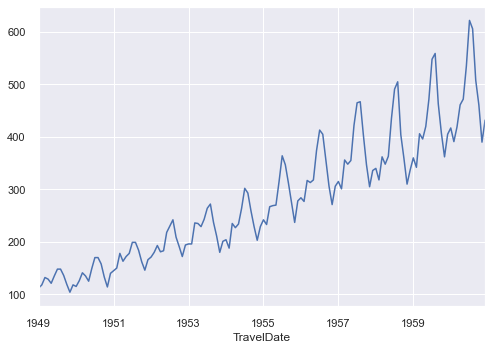

In [103]:
ts.plot();

## Geospatial Data

Geospatial data is map-based (although what constitutes a "map" can go beyond the familiar). Ultimately, geographic data  occurs either in bitmap (raster) form or vector (resizeable polygons). It is not unusual for the two kinds of data to be used together.

Because borders are often complex, following river courses, mountain ranges, and so on, the files that describe their geometries can be large. To reduce file sizes and image rendering times, we prefer to work with polygons that are no more detailed than the maximum resolution we need for our task. For this reason, geospatial files are often available at several different resolutions.

There are several popular options for working with maps in Python. We will use folium for its breadth and its use of open-source data.

In [100]:
import folium

In [398]:
# Read SF Incidents data
#crime_csv = pd.read_csv("/../../DATA_UPDATED/SFPD_Incidents-Current_Year_2015.csv")
crime_csv = pd.read_csv('../../DATA_UPDATED/SFPD_Incidents-Current_Year_2015.csv')
#crime_csv

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,150827188,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Sunday,09/20/2015,23:54,RICHMOND,UNFOUNDED,3000 Block of CLEMENT ST,-122.491851,37.781756,"(37.7817557255921, -122.491851328976)"
1,150827213,ASSAULT,INFLICT INJURY ON COHABITEE,Sunday,09/20/2015,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
2,150827213,ASSAULT,ATTEMPTED HOMICIDE WITH A KNIFE,Sunday,09/20/2015,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
3,150827213,ASSAULT,CHILD ABUSE (PHYSICAL),Sunday,09/20/2015,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
4,150827213,ASSAULT,MAYHEM WITH A KNIFE,Sunday,09/20/2015,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
...,...,...,...,...,...,...,...,...,...,...,...,...
112326,150007653,FRAUD,"CREDIT CARD, THEFT BY USE OF",Friday,01/02/2015,00:01,TENDERLOIN,NONE,400 Block of EDDY ST,-122.415067,37.783563,"(37.7835634796332, -122.41506687647)"
112327,150008457,NON-CRIMINAL,LOST PROPERTY,Friday,01/02/2015,00:01,PARK,NONE,3600 Block of 16TH ST,-122.434221,37.764224,"(37.7642237070482, -122.434221184718)"
112328,150005538,OTHER OFFENSES,TRAFFIC VIOLATION,Friday,01/02/2015,00:01,MISSION,"ARREST, BOOKED",900 Block of POTRERO AV,-122.406870,37.757290,"(37.7572895904578, -122.406870402082)"
112329,150005306,NON-CRIMINAL,LOST PROPERTY,Friday,01/02/2015,00:01,CENTRAL,NONE,700 Block of VALLEJO ST,-122.409792,37.798508,"(37.7985083480435, -122.409791662293)"


Convert `Date` Column to DateTime and set as index 

In [346]:
# ANSWER
crime_csv['Date'] = pd.to_datetime(crime_csv['Date'])
crime_csv = crime_csv.set_index('Date')




Draw a timeseries plot to visualize number of crimes for each day.

<function matplotlib.pyplot.show(*args, **kw)>

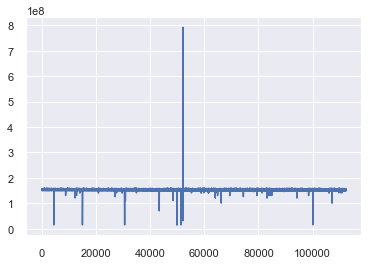

In [389]:
# ANSWER
#crime_csv
crime_csv['IncidntNum']
plt.plot(crime_csv['IncidntNum'])
plt.show

Using folium we can easily create a map. As it's SF data, by default we are using SF location.

In [413]:
def generateBaseMap(default_location=[37.76, -122.45], default_zoom_start=12):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location = default_location
        , control_scale = True
        , zoom_start = default_zoom_start
    )
    
    return base_map

In [414]:
base_map = generateBaseMap(default_location=[37.76, -122.45])
#display(base_map)
base_map

Add a marker in the map using `Folium.Marker` for first 100 rows of the dataset.

In [437]:
# ANSWER


#crime_csv['Location'] = pd.to_numeric(crime_csv['Location'], downcast='integer', errors='coerce')
crime_csv
#folium.Marker([data.iloc[i]['lon'], data.iloc[i]['lat']]).add_to(m)
#folium.Marker([37.76, -122.45]).add_to(base_map)
Lon = crime_csv.iloc[:, 9]
Lat = crime_csv.iloc[:, 10]
folium.Marker([Lon[1], Lat[1]]).add_to(base_map)
display(base_map)
crime_csv.iloc[1:2, 9]

1   -122.413676
Name: X, dtype: float64

Add a cricle in the map using `Folium Circle` for first 100 rows of the dataset.

In [ ]:
# ANSWER

[BONUS] Create a heatmap of the incident happened in SF.

**HOMEWORK** Explore Folium as mush as you can.

**HOMEWORK** Explore GeoPandas

# More Resources

<a name="histfootnote">1</a>: [Histogram](https://en.wikipedia.org/wiki/Histogram)

The matplotlib users' guide is at http://pageperso.lif.univ-mrs.fr/~francois.denis/IAAM1/Matplotlib.pdf.

For visualisation ideas and code see https://python-graph-gallery.com/:

In [ ]:
# GeoPandas

> The goal of GeoPandas is to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in python that would otherwise require a spatial database such as PostGIS.

[GeoPandas 0.4.0](http://geopandas.org/index.html#)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



